<a href="https://colab.research.google.com/github/Susmita-Priya/twitter_depression/blob/main/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install wordcloud

!pip install wordcloud

In [ ]:
# INSTALLING TEXTACY LIBRARY FOR PREPROCESSING
# TEXTACY is used for text preprocessing
!pip install textacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.3 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow_hub

In [ ]:
#IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from wordcloud import WordCloud, STOPWORDS
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Bidirectional, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
twitter_df = pd.read_csv('/content/drive/MyDrive/Dataset/Suicide_Detection (1).csv', encoding =('ISO-8859-1'),low_memory =False)
twitter_df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"Iâm so lostHello, my name is Adam (16) and I...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty teaðð¦â¼ï...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [ ]:
# KEEPING ONLY THE 2 NECESSARY COLUMNS

twitter_df = twitter_df[["text", "class"]]

In [ ]:
# REVIEW DATA AFTER CHANGES

twitter_df.head(15)

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide
5,Honetly idkI dont know what im even doing here...,suicide
6,[Trigger warning] Excuse for self inflicted bu...,suicide
7,It ends tonight.I canât do it anymore. \nI q...,suicide
8,"Everyone wants to be ""edgy"" and it's making me...",non-suicide
9,My life is over at 20 years oldHello all. I am...,suicide


In [ ]:
# CHECK THE SHAPE OF THE DATA

twitter_df.shape

(232074, 2)

In [ ]:
# CHECK IF THERE ARE NULL VALUES

twitter_df.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
# REMOVING DUPLICATE VALUES

twitter_df = twitter_df.drop_duplicates()

In [ ]:
# Check if there's any number

for i in twitter_df['text']:
    for j in i.split():
        if j.isdigit():
            s = "yes"
        else:
            s = "no"
print(s)

no


In [ ]:
twitter_df["class"].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

Text(0.5, 1.0, 'COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT')

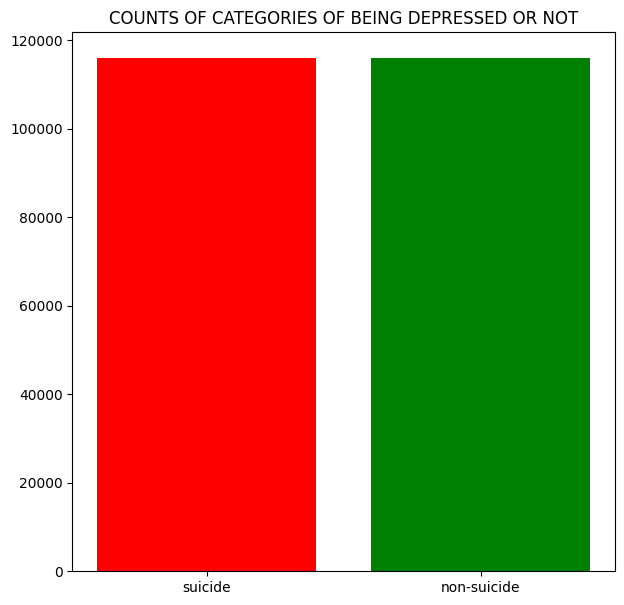

In [ ]:
# CHECKING COUNTS OF CATEGORIES

fig = plt.figure(figsize =(7, 7))
plt.bar(twitter_df["class"].unique(), twitter_df["class"].value_counts(),
         color =['red', 'green'])
plt.title("COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT")

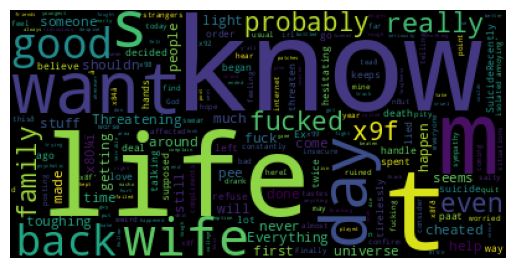

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [ ]:
# CREATING WORDCLOUD TO CHECK MOST OCCURING WORDS IN PREPROCESSED DATA

text = twitter_df['text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.figure(figsize = (40,40), facecolor = None)

In [ ]:
# IMPORT OTHER TEXT PREPROCESSING LIBRARIES

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from textacy import preprocessing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# First Remove all the numbers

def remove_numbers(text):
    return ' '.join([i for i in str(text).split() if not i.isdigit()])

twitter_df['removed_numbers'] = twitter_df['text'].apply(lambda x: remove_numbers(x))
twitter_df.head(5)

,text,class,removed_numbers
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,Ex Wife Threatening SuicideRecently I left my ...
1,Am I weird I don't get affected by compliments...,non-suicide,Am I weird I don't get affected by compliments...
2,Finally 2020 is almost over... So I can never ...,non-suicide,Finally is almost over... So I can never hear ...
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide,"Iâm so lostHello, my name is Adam (16) and I..."


In [ ]:
# CONVERTING TEXT TO LOWER CASE

twitter_df["convert_lower"] = twitter_df["removed_numbers"].str.lower()
twitter_df.head(5)

,text,class,removed_numbers,convert_lower
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,Ex Wife Threatening SuicideRecently I left my ...,ex wife threatening suiciderecently i left my ...
1,Am I weird I don't get affected by compliments...,non-suicide,Am I weird I don't get affected by compliments...,am i weird i don't get affected by compliments...
2,Finally 2020 is almost over... So I can never ...,non-suicide,Finally is almost over... So I can never hear ...,finally is almost over... so i can never hear ...
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide,"Iâm so lostHello, my name is Adam (16) and I...","iâm so losthello, my name is adam (16) and i..."


In [ ]:
# Removal of Weblinks

def remove_weblinks(text):
    return re.sub(r"http\S+", "", text)

twitter_df['removed_weblink'] = twitter_df['convert_lower'].apply(lambda x: remove_weblinks(x))
twitter_df.head(5)

,text,class,removed_numbers,convert_lower,removed_weblink
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,Ex Wife Threatening SuicideRecently I left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...
1,Am I weird I don't get affected by compliments...,non-suicide,Am I weird I don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...
2,Finally 2020 is almost over... So I can never ...,non-suicide,Finally is almost over... So I can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide,"Iâm so lostHello, my name is Adam (16) and I...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i..."


In [ ]:
# Remove Twitter mention

def remove_twitter(text):
    return re.sub('@[\w]+','',text)
twitter_df['removed_mention'] = twitter_df['removed_weblink'].apply(lambda x: remove_twitter(x))
twitter_df.head(5)

,text,class,removed_numbers,convert_lower,removed_weblink,removed_mention
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,Ex Wife Threatening SuicideRecently I left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...
1,Am I weird I don't get affected by compliments...,non-suicide,Am I weird I don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...
2,Finally 2020 is almost over... So I can never ...,non-suicide,Finally is almost over... So I can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide,"Iâm so lostHello, my name is Adam (16) and I...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i..."


In [ ]:
# REMOVING THE STOPWORDS
# Stopwords do not carry any significant meaning, such as "the", "and", "is", etc. Removing stopwords is a common text preprocessing step in natural language processing tasks as they can reduce noise in the data and improve the quality of analysis.

stop = stopwords.words('english')

twitter_df["removed_stopword"] = twitter_df['removed_mention'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
twitter_df.head(5)

,text,class,removed_numbers,convert_lower,removed_weblink,removed_mention,removed_stopword
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,Ex Wife Threatening SuicideRecently I left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently left wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,Am I weird I don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...,weird get affected compliments coming someone ...
2,Finally 2020 is almost over... So I can never ...,non-suicide,Finally is almost over... So I can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...,"finally almost over... never hear ""2020 bad ye..."
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,need helpjust help im crying hard
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide,"Iâm so lostHello, my name is Adam (16) and I...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i...","iâm losthello, name adam (16) iâve struggl..."


In [ ]:
# REMOVING PUNCTUATION, EXTRA WHITESPACES AND HASHTAGS

preprocess = preprocessing.make_pipeline(
    preprocessing.remove.punctuation,
    preprocessing.normalize.whitespace,
    preprocessing.replace.hashtags,
)

twitter_df["removed_punctuation"] = twitter_df["removed_stopword"].apply(preprocess)
twitter_df.head(5)

,text,class,removed_numbers,convert_lower,removed_weblink,removed_mention,removed_stopword,removed_punctuation
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,Ex Wife Threatening SuicideRecently I left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,Am I weird I don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...
2,Finally 2020 is almost over... So I can never ...,non-suicide,Finally is almost over... So I can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...,"finally almost over... never hear ""2020 bad ye...",finally almost over never hear 2020 bad year e...
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,need helpjust help im crying hard,need helpjust help im crying hard
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide,"Iâm so lostHello, my name is Adam (16) and I...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i...","iâm losthello, name adam (16) iâve struggl...",iâm losthello name adam 16 iâve struggling...


In [ ]:
# STEMMING THE WORDS
#Stemming is the process of reducing words to their base or root form, which can be useful for reducing the dimensionality of the text data.

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
twitter_df['stemmed'] = twitter_df['removed_punctuation'].apply(lambda x: stemmer.stem(x))
twitter_df.head(5)

,text,class,removed_numbers,convert_lower,removed_weblink,removed_mention,removed_stopword,removed_punctuation,stemmed
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,Ex Wife Threatening SuicideRecently I left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,Am I weird I don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...
2,Finally 2020 is almost over... So I can never ...,non-suicide,Finally is almost over... So I can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...,"finally almost over... never hear ""2020 bad ye...",finally almost over never hear 2020 bad year e...,finally almost over never hear 2020 bad year e...
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,need helpjust help im crying hard,need helpjust help im crying hard,need helpjust help im crying hard
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide,"Iâm so lostHello, my name is Adam (16) and I...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i...","iâm losthello, name adam (16) iâve struggl...",iâm losthello name adam 16 iâve struggling...,iâm losthello name adam 16 iâve struggling...


In [ ]:
# Apply regular expression for remove special character and non-alphabetical character
twitter_df['removed_specialchar'] = twitter_df['stemmed'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
twitter_df.head(5)

,text,class,removed_numbers,convert_lower,removed_weblink,removed_mention,removed_stopword,removed_punctuation,stemmed,removed_specialchar
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,Ex Wife Threatening SuicideRecently I left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,Am I weird I don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...
2,Finally 2020 is almost over... So I can never ...,non-suicide,Finally is almost over... So I can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...,"finally almost over... never hear ""2020 bad ye...",finally almost over never hear 2020 bad year e...,finally almost over never hear 2020 bad year e...,finally almost over never hear bad year ever ...
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,need helpjust help im crying hard,need helpjust help im crying hard,need helpjust help im crying hard,need helpjust help im crying hard
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide,"Iâm so lostHello, my name is Adam (16) and I...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i...","iâm losthello, name adam (16) iâve struggl...",iâm losthello name adam 16 iâve struggling...,iâm losthello name adam 16 iâve struggling...,im losthello name adam ive struggling years i...


In [ ]:
from collections import Counter
cnt = Counter()

for text in twitter_df['removed_specialchar'].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('i', 366513),
 ('m', 229708),
 ('like', 181510),
 ('want', 148389),
 ('know', 131684),
 ('im', 131408),
 ('feel', 122989),
 ('life', 120047),
 ('get', 111365),
 ('me', 108348)]

In [ ]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

# Let's see what are the Rarewords

RAREWORDS

{'asshatted',
 'beliieve',
 'conk',
 'corect',
 'decease',
 'gonging',
 'hebsoowbejrn',
 'jejeiejebeuue',
 'nriebejuebe',
 'xhdkeleoneidowk'}

In [ ]:
# Let's remove these

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

twitter_df['removed_rareword'] = twitter_df['removed_specialchar'].apply(lambda x: remove_stopwords(x))
twitter_df.head(5)

,text,class,removed_numbers,convert_lower,removed_weblink,removed_mention,removed_stopword,removed_punctuation,stemmed,removed_specialchar,removed_rareword
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,Ex Wife Threatening SuicideRecently I left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,Am I weird I don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...
2,Finally 2020 is almost over... So I can never ...,non-suicide,Finally is almost over... So I can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...,"finally almost over... never hear ""2020 bad ye...",finally almost over never hear 2020 bad year e...,finally almost over never hear 2020 bad year e...,finally almost over never hear bad year ever ...,finally almost over never hear bad year ever a...
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,need helpjust help im crying hard,need helpjust help im crying hard,need helpjust help im crying hard,need helpjust help im crying hard,need helpjust help im crying hard
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide,"Iâm so lostHello, my name is Adam (16) and I...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i...","iâm losthello, name adam (16) iâve struggl...",iâm losthello name adam 16 iâve struggling...,iâm losthello name adam 16 iâve struggling...,im losthello name adam ive struggling years i...,im losthello name adam ive struggling years im...


In [ ]:
df=pd.DataFrame(twitter_df['removed_rareword'])
df=df.rename({"removed_rareword":"text"},axis="columns")
df.head(5)

,text
0,ex wife threatening suiciderecently left wife ...
1,weird get affected compliments coming someone ...
2,finally almost over never hear bad year ever a...
3,need helpjust help im crying hard
4,im losthello name adam ive struggling years im...


In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

wordnet_map = {"n": wordnet.NOUN, "v": wordnet.VERB, "j": wordnet.ADJ, "r": wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.VERB)) for word, pos in pos_tagged_text])

twitter_df["text_lemmatized"] = twitter_df['removed_rareword'].apply(lambda text: lemmatize_words(text))
twitter_df.head(5)

,text,class,removed_numbers,convert_lower,removed_weblink,removed_mention,removed_stopword,removed_punctuation,stemmed,removed_specialchar,removed_rareword,text_lemmatized
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,Ex Wife Threatening SuicideRecently I left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...,ex wife threaten suiciderecently leave wife go...
1,Am I weird I don't get affected by compliments...,non-suicide,Am I weird I don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...,weird get affect compliment come someone know ...
2,Finally 2020 is almost over... So I can never ...,non-suicide,Finally is almost over... So I can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...,"finally almost over... never hear ""2020 bad ye...",finally almost over never hear 2020 bad year e...,finally almost over never hear 2020 bad year e...,finally almost over never hear bad year ever ...,finally almost over never hear bad year ever a...,finally almost over never hear bad year ever a...
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,need helpjust help im crying hard,need helpjust help im crying hard,need helpjust help im crying hard,need helpjust help im crying hard,need helpjust help im crying hard,need helpjust help im cry hard
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide,"Iâm so lostHello, my name is Adam (16) and I...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i...","iâm losthello, name adam (16) iâve struggl...",iâm losthello name adam 16 iâve struggling...,iâm losthello name adam 16 iâve struggling...,im losthello name adam ive struggling years i...,im losthello name adam ive struggling years im...,im losthello name adam ive struggle years im a...


In [ ]:
df1=pd.DataFrame(twitter_df['text_lemmatized'])
df1.head(5)

,text_lemmatized
0,ex wife threaten suiciderecently leave wife go...
1,weird get affect compliment come someone know ...
2,finally almost over never hear bad year ever a...
3,need helpjust help im cry hard
4,im losthello name adam ive struggle years im a...


In [ ]:
short_words = {
"aint": "am not",
"arent": "are not",
"cant": "cannot",
"'cause": "because",
"couldve": "could have",
"couldnt": "could not",
"didnt": "did not",
"doesnt": "does not",
"dont": "do not",
"hadnt": "had not",
"hasnt": "has not",
"havent": "have not",
"im": "I am",
"em": "them",
"ive": "I have",
"isnt": "is not",
"lets": "let us",
"theyre": "they are",
"theyve": "they have",
"wasnt": "was not",
"well": "we will",
"were": "we are",
"werent": "were not",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def replace_short_words(text):
    for word in text.split():
        if word in short_words:
            text = text.replace(word, short_words[word])
    return text

twitter_df["abbrev_expansion"] = twitter_df['text_lemmatized'].apply(lambda text: replace_short_words(text))
twitter_df.head(5)

,text,class,removed_numbers,convert_lower,removed_weblink,removed_mention,removed_stopword,removed_punctuation,stemmed,removed_specialchar,removed_rareword,text_lemmatized,abbrev_expansion
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,Ex Wife Threatening SuicideRecently I left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently i left my ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...,ex wife threatening suiciderecently left wife ...,ex wife threaten suiciderecently leave wife go...,ex wife threaten suiciderecently leave wife go...
1,Am I weird I don't get affected by compliments...,non-suicide,Am I weird I don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...,am i weird i don't get affected by compliments...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...,weird get affected compliments coming someone ...,weird get affect compliment come someone know ...,weird get affect compliment come someone know ...
2,Finally 2020 is almost over... So I can never ...,non-suicide,Finally is almost over... So I can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...,finally is almost over... so i can never hear ...,"finally almost over... never hear ""2020 bad ye...",finally almost over never hear 2020 bad year e...,finally almost over never hear 2020 bad year e...,finally almost over never hear bad year ever ...,finally almost over never hear bad year ever a...,finally almost over never hear bad year ever a...,finally almost over never hear bad year ever a...
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,need helpjust help im crying hard,need helpjust help im crying hard,need helpjust help im crying hard,need helpjust help im crying hard,need helpjust help im crying hard,need helpjust help im cry hard,need helpjust help I am cry hard
4,"Iâm so lostHello, my name is Adam (16) and I...",suicide,"Iâm so lostHello, my name is Adam (16) and I...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i...","iâm so losthello, my name is adam (16) and i...","iâm losthello, name adam (16) iâve struggl...",iâm losthello name adam 16 iâve struggling...,iâm losthello name adam 16 iâve struggling...,im losthello name adam ive struggling years i...,im losthello name adam ive struggling years im...,im losthello name adam ive struggle years im a...,I am losthello name adam I have struggle years...


In [ ]:
twitter_df = twitter_df[['abbrev_expansion','class']]
#Rename Column
twitter_df.columns = ['text','class']
twitter_df.head(15)

,text,class
0,ex wife threaten suiciderecently leave wife go...,suicide
1,weird get affect compliment come someone know ...,non-suicide
2,finally almost over never hear bad year ever a...,non-suicide
3,need helpjust help I am cry hard,suicide
4,I am losthello name adam I have struggle years...,suicide
5,honetly idki do not know I am even here feel l...,suicide
6,trigger warn excuse self inflict burn i know c...,suicide
7,end tonight i cannot anymore quit,suicide
8,everyone want edgy make self conscious feel li...,non-suicide
9,life years oldhello all year old bald male hai...,suicide


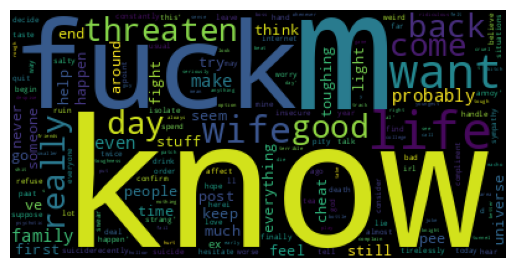

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [ ]:
# CREATING WORDCLOUD TO SEE MOST OCCURING WORDS AFTER PREPROCESSING

TEXT_AFTER_PREPROCESS = twitter_df['text'].values

wordcloud = WordCloud().generate(str(TEXT_AFTER_PREPROCESS))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.figure(figsize = (40,40), facecolor = None)

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT TF-IDF ALGORITHM

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import vstack
from sklearn.decomposition import TruncatedSVD

In [ ]:
# CREATING CORPUS OF OUR WORDS

corpus = twitter_df['text'].tolist()

In [ ]:
# PRINTING NO. OF WORDS OF OUR CORPUS

print("Total no. of words in our corpus are:", len(corpus),'\n')

Total no. of words in our corpus are: 232074 



In [ ]:
# FITTING VECTORIZER TO OUR DATA

vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

TfidfVectorizer()

In [ ]:
# Vectorize the Twitter data
Text_tf = vectorizer.transform(twitter_df['text'])

In [ ]:
# Calculate the TF-IDF scores for each feature (word) in the corpus
tfidf_scores = np.array(Text_tf.sum(axis=0)).flatten()

# Get the feature names (words)
feature_array = np.array(vectorizer.get_feature_names_out())

# Get the indices that would sort the TF-IDF scores in descending order
tfidf_sorting = np.argsort(tfidf_scores)[::-1]
n = 5
# Get the top 5 words with the highest TF-IDF scores
top_n = feature_array[tfidf_sorting][:n]

print("The 5 most important words are:", top_n)

The 5 most important words are: ['am' 'want' 'get' 'like' 'feel']


In [ ]:
# GETTING WORDS WITH THE LEAST TF-IDF SCORES

bottom_n = feature_array[tfidf_sorting][-n:]
print(" The 5 least important words having lowest tf-idf scores are", bottom_n)
print('\n')

 The 5 least important words having lowest tf-idf scores are ['choral' 'fillerfillerbigfillerd' 'letmedi' 'bbye' 'uywdof']




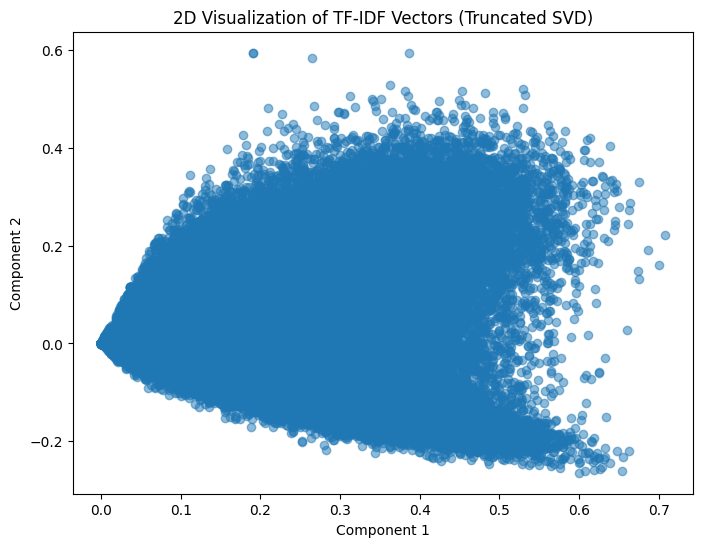

In [ ]:
# Perform PCA to reduce the TF-IDF vectors to 2D
n_components = 2
svd = TruncatedSVD(n_components=n_components)
df2d = pd.DataFrame(svd.fit_transform(Text_tf), columns=['component1', 'component2'])

# Plot the 2D representation
plt.figure(figsize=(8, 6))
plt.scatter(df2d['component1'], df2d['component2'], alpha=0.5)
plt.title("2D Visualization of TF-IDF Vectors (Truncated SVD)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [ ]:
# RENAMING COLUMNS BACK TO INITIAL ENCODED NUMBERS AS EXPLORATION IS OVER AND WE SHALL NEED ENCODED NUMBERS FOR FURTHER ANALYSIS

twitter_df['class'] = twitter_df['class'].replace('non-suicide', 0)
twitter_df['class'] = twitter_df['class'].replace('suicide', 1)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(Text_tf,twitter_df["class"], test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((185659, 132345), (46415, 132345))

In [ ]:
# IMPORTING TIME LIBRARY TO PRINT THE TIME TAKEN TO TRAIN AND PREDICT WITH THE MODEL

from time import time

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT LOGISTIC REGRESSION

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
lr_t0 = time()

# Define hyperparameters and their possible values
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create the Logistic Regression model
lr = LogisticRegression()

# Create Grid Search with cross-validation
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_lr.fit(x_train, y_train)

print("Training Time of the Logistic Regression Model:", round(time()-lr_t0, 3), "seconds",'\n')

Training Time of the Logistic Regression Model: 156.419 seconds 



In [ ]:
lr_t1 = time()

# Get the best estimator and its hyperparameters
best_lr = grid_search_lr.best_estimator_
best_params_lr = grid_search_lr.best_params_

# Predict using the best estimator
y_pred_best_lr = best_lr.predict(x_test)

print("Time taken to make predictions for the Logistic Regression Model:", round(time()-lr_t1, 3), "seconds",'\n')

Time taken to make predictions for the Logistic Regression Model: 0.016 seconds 



In [ ]:
# Evaluate the best model
best_lr_accuracy = accuracy_score(y_test, y_pred_best_lr)
print("Accuracy Score of the Best Logistic Regression model:", best_lr_accuracy)

Accuracy Score of the Best Logistic Regression model: 0.93635678121297


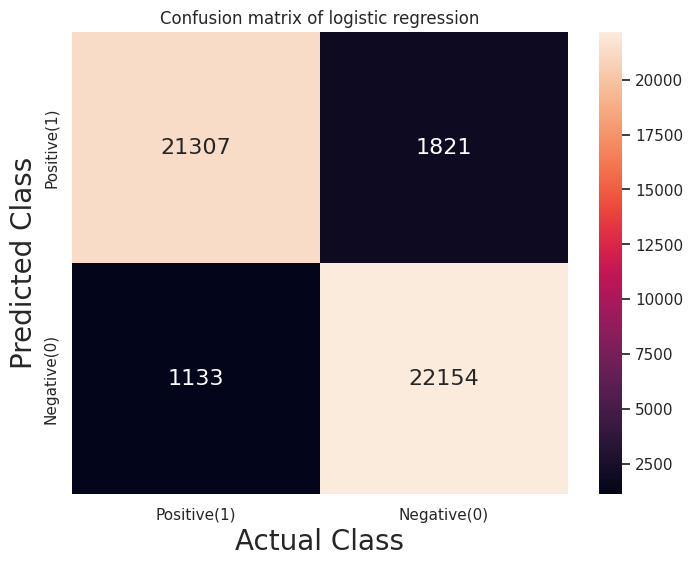

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred_best_lr, labels = [1,0])
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cf, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16}).set(title='Confusion matrix of logistic regression')

plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform k-fold cross-validation (replace 'k' with your desired number of folds)
k = 5  # Number of folds (you can change this value)
scores = cross_val_score(clf, Text_tf, twitter_df["class"], cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.85974362 0.85834321 0.85763223 0.85886028 0.85633645]
Mean Accuracy: 0.8581831577569761


In [ ]:


# FITTING THE MODEL

dt_t0=time()

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print("Training Time of the Decision Tree Model:", round(time()-dt_t0, 3), "seconds", '\n')

Training Time of the Decision Tree Model: 672.327 seconds 



In [ ]:
# PRINTING MAX DEPTH OF OUR DECISION TREE MODEL

dt_depth = dt.tree_.max_depth
print("Max depth of our Decision Tree Model is:", dt_depth)
print('\n')

Max depth of our Decision Tree Model is: 1971




In [ ]:
# PRINTING NO. OF NODES OF OUR DECISION TREE MODEL

dt_nodes = dt.tree_.node_count
print("No. of nodes of our Decision Tree Model is:", dt_nodes)
print('\n')

No. of nodes of our Decision Tree Model is: 27025




In [ ]:
# PREDICTING WITH THE MODEL

dt_t1=time()

y_pred_dt = dt.predict(x_test)

print("Time taken to make predictions for the Decision Tree Model:", round(time()-dt_t1, 3), "seconds",'\n')

Time taken to make predictions for the Decision Tree Model: 0.12 seconds 



In [ ]:
print("Accuracy Score of our decision tree model is: ", accuracy_score(y_pred_dt, y_test), "\n")

Accuracy Score of our decision tree model is:  0.8581708499407519 



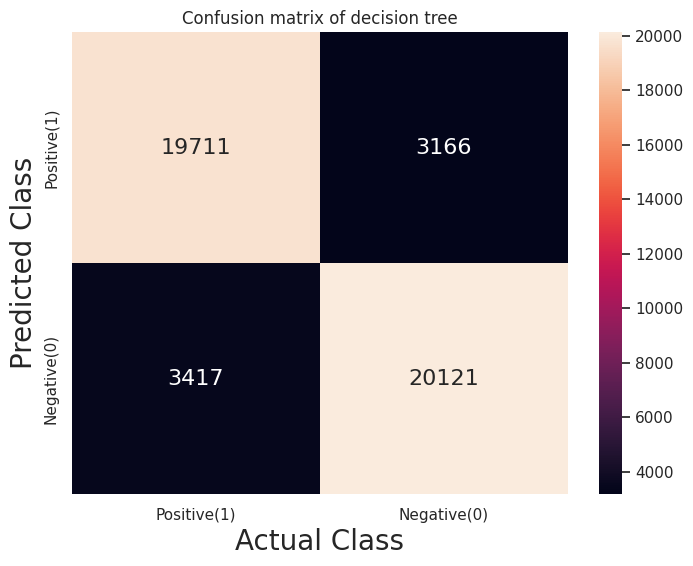

In [ ]:
cf2 = confusion_matrix(y_pred_dt, y_test, labels = [1,0])

x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cf2, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16}).set(title='Confusion matrix of decision tree')

plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT RANDOM FORESTS CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# FITTING THE MODEL

rf_t0=time()

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

print("Training Time of the Random Forest Model:", round(time()-rf_t0, 3), "seconds", '\n')

Training Time of the Random Forest Model: 3049.861 seconds 



In [ ]:
# PRINTING MAX DEPTH OF OUR RANDOM FOREST MODEL

rf_depth = rf.estimators_[0].tree_.max_depth
print("Max depth of our Random forest Model is:", rf_depth)
print('\n')

Max depth of our Random forest Model is: 1814




In [ ]:
# PRINTING NUMBER OF ESTIMATORS (DECISION TREES) USED IN BUILDING OUR RNADOM FOREST MODEL

n_nodes = rf.estimators_
print("No. of estimators (decision trees) used for building our Random Forest model are:",len(n_nodes))
print("\n")

No. of estimators (decision trees) used for building our Random Forest model are: 100




In [ ]:
# PREDICTING WITH THE MODEL

rf_t1 = time()

y_pred_rf = rf.predict(x_test)

print("Time taken to make predictions for the Random Forest Model:", round(time()-rf_t1, 3), "seconds", '\n')

Time taken to make predictions for the Random Forest Model: 7.485 seconds 



In [ ]:
print("Accuracy Score of random forest model is: ", accuracy_score(y_pred_rf, y_test), "\n")

Accuracy Score of random forest model is:  0.904061187116234 



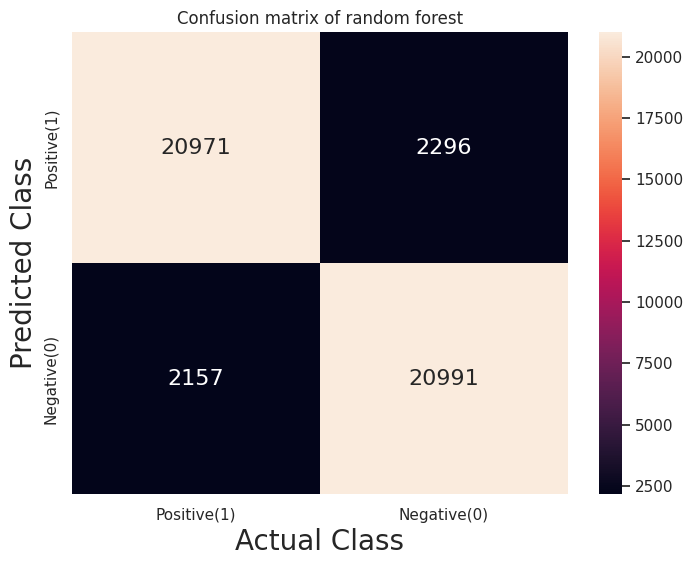

In [ ]:
cf3 = confusion_matrix(y_pred_rf, y_test, labels = [1,0])

x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cf3, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16}).set(title='Confusion matrix of random forest')

plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# FITTING THE MODEL

gb_t0=time()

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_classifier.fit(x_train, y_train)

print("Training Time of the GradientBoost Model:", round(time()-gb_t0, 3), "seconds", '\n')

Training Time of the GradientBoost Model: 3464.629 seconds 



In [ ]:
# PREDICTING WITH THE MODEL

gb_t1 = time()

# Make predictions on the test data
y_pred_gb = gb_classifier.predict(x_test)

print("Time taken to make predictions for the gradient boost Model:", round(time()-gb_t1, 3), "seconds", '\n')

Time taken to make predictions for the gradient boost Model: 0.217 seconds 



In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gb)
print("Accuracy of gradient Boost model :", accuracy)

Accuracy of gradient Boost model : 0.8803188624367123


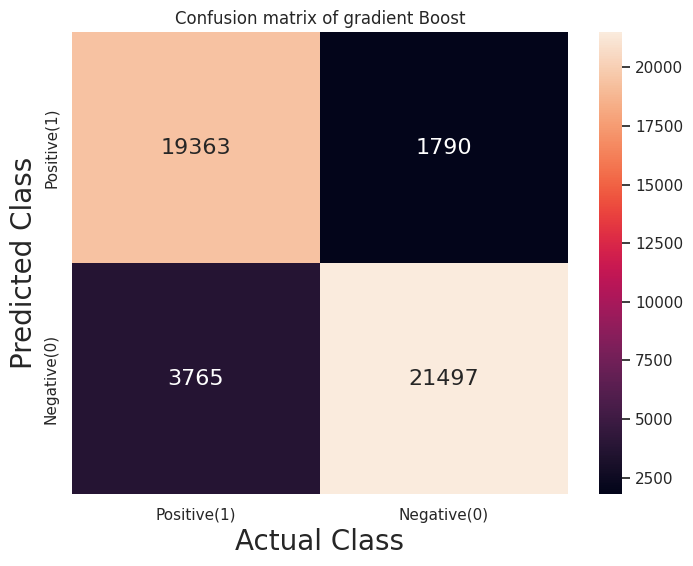

In [ ]:
cf4 = confusion_matrix(y_pred_gb, y_test, labels = [1,0])

x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cf4, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16}).set(title='Confusion matrix of gradient Boost')

plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

In [ ]:
## NaiveBayes

from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Fitting the model

mnb_t0=time()
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
print("Training Time of Naive baias Model:", round(time()-mnb_t0, 3), "seconds", '\n')

Training Time of Naive baias Model: 0.198 seconds 



In [ ]:
# PREDICTING WITH THE MODEL

mnb_t1 = time()

y_pred_mnb = mnb.predict(x_test)

print("Time taken to make predictions for the Naive Baias Model:", round(time()-mnb_t1, 3), "seconds", '\n')

Time taken to make predictions for the Naive Baias Model: 0.042 seconds 



In [ ]:
print("Accuracy Score of our Naive Baias model is: ", accuracy_score(y_pred_mnb, y_test), "\n")

Accuracy Score of our Naive Baias model is:  0.8899709145750296 



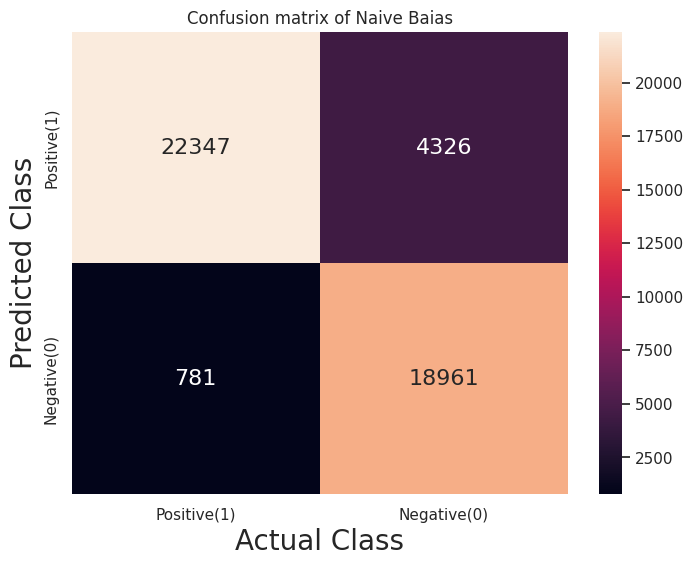

In [ ]:
cf5 = confusion_matrix(y_pred_mnb, y_test, labels = [1,0])

x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cf5, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16}).set(title='Confusion matrix of Naive Baias')

plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

In [ ]:
# Convert text data to a list of strings
x_train = [str(text) for text in x_train]
x_test = [str(text) for text in x_test]

# Create a tokenizer and fit on the training data
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

In [ ]:

# Convert text data to sequences
X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)

In [ ]:
# Pad sequences to ensure consistent length
max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [ ]:
# Build the LSTM model
embedding_dim = 128
lstm_units = 64

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(lstm_units),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train the model
batch_size = 64
epochs = 10

model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

Epoch 1/10
2901/2901 [==============================] - 498s 170ms/step - loss: 0.2406 - accuracy: 0.9081 - val_loss: 0.2041 - val_accuracy: 0.9225
Epoch 2/10
2901/2901 [==============================] - 490s 169ms/step - loss: 0.1926 - accuracy: 0.9276 - val_loss: 0.2063 - val_accuracy: 0.9258
Epoch 3/10
2901/2901 [==============================] - 490s 169ms/step - loss: 0.1790 - accuracy: 0.9323 - val_loss: 0.2021 - val_accuracy: 0.9238
Epoch 4/10
2901/2901 [==============================] - 490s 169ms/step - loss: 0.1675 - accuracy: 0.9369 - val_loss: 0.1963 - val_accuracy: 0.9262
Epoch 5/10
2901/2901 [==============================] - 490s 169ms/step - loss: 0.1578 - accuracy: 0.9398 - val_loss: 0.1992 - val_accuracy: 0.9250
Epoch 6/10
2901/2901 [==============================] - 492s 170ms/step - loss: 0.1477 - accuracy: 0.9436 - val_loss: 0.2107 - val_accuracy: 0.9242
Epoch 7/10
2901/2901 [==============================] - 493s 170ms/step - loss: 0.1390 - accuracy: 0.9463 - val_

In [ ]:
# Evaluate the model
Loss,acc = model.evaluate(X_test_pad, y_test)
print("Accuracy Score of our LSTM model is::", acc)

1451/1451 [==============================] - 35s 24ms/step - loss: 0.2729 - accuracy: 0.9206
Accuracy Score of our LSTM model is:: 0.9206075668334961


1451/1451 [==============================] - 34s 23ms/step


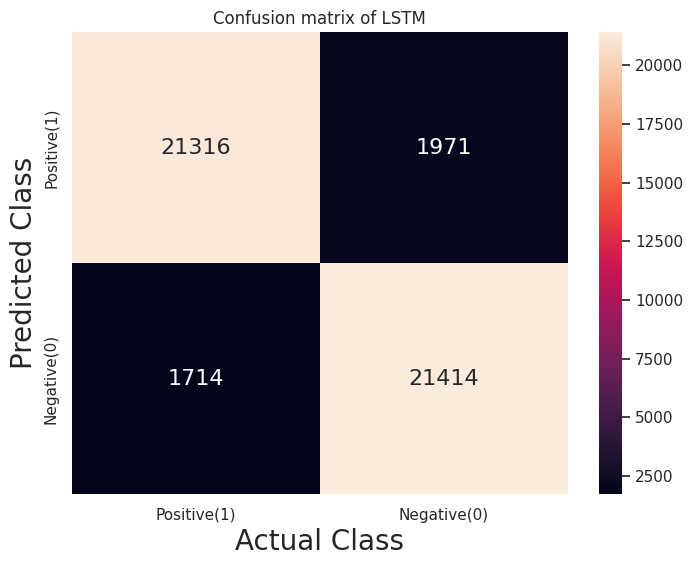

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test_pad)
y_pred_binary = (y_pred > 0.5).astype(int)

# Create a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix

x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16}).set(title='Confusion matrix of LSTM')

plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

In [ ]:
# Tokenize the text data
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)

In [ ]:
# Pad sequences to ensure consistent length
max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [ ]:
# Build the CNN model
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
batch_size = 32
epochs = 10
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
4642/4642 [==============================] - 276s 59ms/step - loss: 0.2426 - accuracy: 0.9061 - val_loss: 0.2004 - val_accuracy: 0.9214
Epoch 2/10
4642/4642 [==============================] - 272s 59ms/step - loss: 0.1884 - accuracy: 0.9301 - val_loss: 0.1968 - val_accuracy: 0.9232
Epoch 3/10
4642/4642 [==============================] - 270s 58ms/step - loss: 0.1618 - accuracy: 0.9402 - val_loss: 0.2060 - val_accuracy: 0.9216
Epoch 4/10
4642/4642 [==============================] - 271s 58ms/step - loss: 0.1345 - accuracy: 0.9503 - val_loss: 0.2144 - val_accuracy: 0.9191
Epoch 5/10
4642/4642 [==============================] - 271s 58ms/step - loss: 0.1043 - accuracy: 0.9613 - val_loss: 0.2478 - val_accuracy: 0.9182
Epoch 6/10
4642/4642 [==============================] - 276s 59ms/step - loss: 0.0791 - accuracy: 0.9701 - val_loss: 0.2995 - val_accuracy: 0.9130
Epoch 7/10
4642/4642 [==============================] - 275s 59ms/step - loss: 0.0608 - accuracy: 0.9767 - val_loss: 0

In [ ]:
# Evaluate the model
loss, accuracycnn = model.evaluate(X_test_pad, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracycnn)

1451/1451 [==============================] - 23s 16ms/step - loss: 0.5292 - accuracy: 0.9104
Test Loss: 0.5292037725448608
Test Accuracy: 0.9103953242301941


1451/1451 [==============================] - 21s 14ms/step


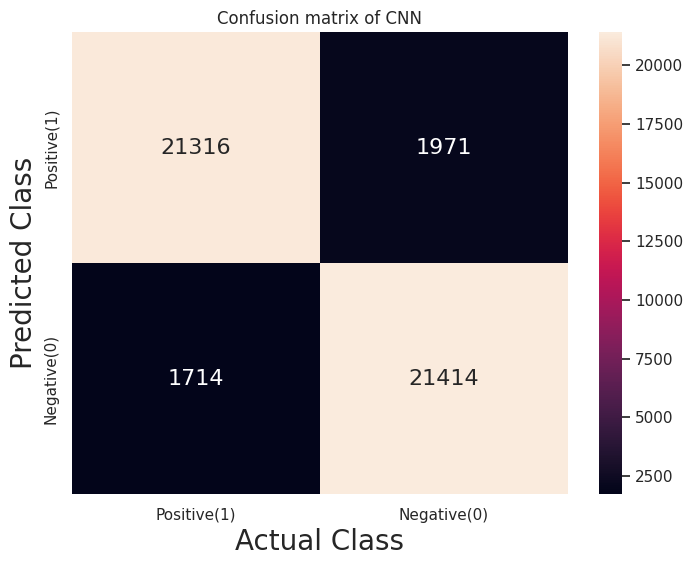

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test_pad)
y_pred_cnn = (y_pred > 0.5).astype(int)

ccnn = confusion_matrix(y_test, y_pred_cnn)

# Plot the confusion matrix

x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(ccnn, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16}).set(title='Confusion matrix of CNN')

plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

In [ ]:
# IMPORTING LIBRARIES TO EVALAUTE MODELS

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
# CHECKING THE ACCURACY SCORES OF MODELS

print("THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS:", "\n")
print("Accuracy Score of our Logistic Regression model is: ", best_lr_accuracy, "\n")
print("Accuracy Score of our Decision Tree Classifier is: ", accuracy_score(y_pred_dt, y_test), "\n")
print("Accuracy Score of our Random Forest Classifier is: ", accuracy_score(y_pred_rf, y_test), "\n")
print("Accuracy Score of our Gradient boost Classifier is: ", accuracy, "\n")
print("Accuracy Score of our Naive Baias Classifier is: ", accuracy_score(y_pred_mnb, y_test), "\n")
print("Accuracy Score of our LSTM Classifier is: ", acc, "\n")
print("Accuracy Score of our CNN Classifier is: ", accuracycnn, "\n")

THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS: 

Accuracy Score of our Logistic Regression model is:  0.93635678121297 

Accuracy Score of our Decision Tree Classifier is:  0.8581708499407519 

Accuracy Score of our Random Forest Classifier is:  0.904061187116234 

Accuracy Score of our Gradient boost Classifier is:  0.8803188624367123 

Accuracy Score of our Naive Baias Classifier is:  0.8899709145750296 

Accuracy Score of our LSTM Classifier is:  0.9206075668334961 

Accuracy Score of our CNN Classifier is:  0.9103953242301941 



<Figure size 8000x8000 with 0 Axes>

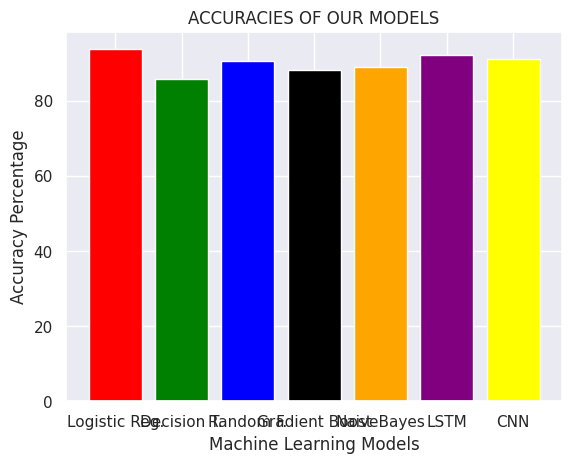

<Figure size 8000x8000 with 0 Axes>

In [ ]:
# COMPARING THE ACCURACIES OF MODELS USING A BAR PLOT

plt.bar(x = ["Logistic Reg.","Decision T.", "Random F.", "Gradient Boost","NaiveBayes", "LSTM","CNN"], height = [(best_lr_accuracy)*100, (accuracy_score(y_pred_dt, y_test))*100,(accuracy_score(y_pred_rf, y_test))*100,(accuracy)*100,(accuracy_score(y_pred_mnb, y_test))*100,(acc)*100,(accuracycnn)*100], color = ["red", "green", "blue", "Black", "orange","purple","yellow"])
plt.title("ACCURACIES OF OUR MODELS")
plt.ylabel("Accuracy Percentage")
plt.xlabel("Machine Learning Models")
plt.figure(figsize=(80,80))

In [ ]:
# CHECKING THE F1 SCORES OF MODELS

print("THE F1 SCORES OF OUR MODELS:", "\n")
print("F1 Score of our Logistic Regression model is: ", f1_score(y_pred_best_lr, y_test), "\n")
print("F1 Score of our Decision Tree Classifier is: ", f1_score(y_pred_dt, y_test), "\n")
print("F1 Score of our Random Forest Classifier is: ", f1_score(y_pred_rf, y_test), "\n")
print("F1 Score of our gradient boost Classifier is: ", f1_score(y_pred_gb, y_test), "\n")
print("F1 Score of our NaiveBayes Classifier is: ", f1_score(y_pred_mnb, y_test), "\n")
print("F1 Score of our LSTM Classifier is: ", f1_score(y_test,y_pred_binary), "\n")
print("F1 Score of our CNN Classifier is: ", f1_score(y_pred_cnn, y_test), "\n")

THE F1 SCORES OF OUR MODELS: 

F1 Score of our Logistic Regression model is:  0.9351738061797752 

F1 Score of our Decision Tree Classifier is:  0.8569068579502228 

F1 Score of our Random Forest Classifier is:  0.9040198297230305 

F1 Score of our gradient boost Classifier is:  0.8745511618978795 

F1 Score of our NaiveBayes Classifier is:  0.8974518583964177 

F1 Score of our LSTM Classifier is:  0.9207748371423043 

F1 Score of our CNN Classifier is:  0.9104647908548794 



In [ ]:
# CHECKING THE RECALL SCORE

print("THE RECALL SCORES OF OUR MODELS", "\n")
print("Recall Score of our Logistic Regression model is: ", recall_score(y_pred_best_lr, y_test), "\n")
print("Recall Score of our Decision Tree Classifier is: ", recall_score(y_pred_dt, y_test), "\n")
print("Recall Score of our Random Forest Classifier is: ", recall_score(y_pred_rf, y_test), "\n")
print("Recall Score of our gradient boost Classifier is: ", recall_score(y_pred_gb, y_test), "\n")
print("Recall Score of our NaiveBayes Classifier is: ", recall_score(y_pred_mnb, y_test), "\n")
print("Recall Score of our LSTM Classifier is: ", recall_score(y_pred_binary,y_test), "\n")
print("Recall Score of our CNN Classifier is: ", recall_score(y_pred_cnn, y_test), "\n")

THE RECALL SCORES OF OUR MODELS 

Recall Score of our Logistic Regression model is:  0.9495098039215686 

Recall Score of our Decision Tree Classifier is:  0.8616077282860515 

Recall Score of our Random Forest Classifier is:  0.9013194653371728 

Recall Score of our gradient boost Classifier is:  0.9153784333191509 

Recall Score of our NaiveBayes Classifier is:  0.8378135192891688 

Recall Score of our LSTM Classifier is:  0.9157152020525978 

Recall Score of our CNN Classifier is:  0.9066586631222399 



In [ ]:
# CHECKING THE PRECISION score
from sklearn.metrics import precision_score

print("THE PRECISION SCORES OF OUR MODELS", "\n")
print("PRECISION Score of our Logistic Regression model is: ", precision_score(y_pred_best_lr, y_test), "\n")
print("PRECISION Score of our Decision Tree Classifier is: ", precision_score(y_pred_dt, y_test), "\n")
print("PRECISION Score of our Random Forest Classifier is: ", precision_score(y_pred_rf, y_test), "\n")
print("PRECISION Score of our gradient boost Classifier is: ", precision_score(y_pred_gb, y_test), "\n")
print("PRECISION Score of our NaiveBayes Classifier is: ", precision_score(y_pred_mnb, y_test), "\n")
print("PRECISION Score of our LSTM Classifier is: ", precision_score(y_test,y_pred_binary) ,"\n")
print("PRECISION Score of our CNN Classifier is: ", precision_score(y_pred_cnn, y_test), "\n")

THE PRECISION SCORES OF OUR MODELS 

PRECISION Score of our Logistic Regression model is:  0.9212642684192321 

PRECISION Score of our Decision Tree Classifier is:  0.8522570044967139 

PRECISION Score of our Random Forest Classifier is:  0.9067364233829125 

PRECISION Score of our gradient boost Classifier is:  0.8372103078519544 

PRECISION Score of our NaiveBayes Classifier is:  0.9662314078173643 

PRECISION Score of our LSTM Classifier is:  0.9157152020525978 

PRECISION Score of our CNN Classifier is:  0.914303009339329 

